In [52]:
import torch
from torch.utils.data import Dataset, DataLoader
import os, os.path 
import numpy
from tqdm.notebook import tqdm
import random
import time
import pickle
from glob import glob
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

"""
    number of trajectories in each city
    # austin --  train: 43041 test: 6325 
    # miami -- train: 55029 test:7971
    # pittsburgh -- train: 43544 test: 6361
    # dearborn -- train: 24465 test: 3671
    # washington-dc -- train: 25744 test: 3829
    # palo-alto -- train:  11993 test:1686

    trajectories sampled at 10HZ rate, input 5 seconds, output 6 seconds
    
"""
None

In [53]:
%load_ext autoreload
%autoreload 2

from util import *
from data import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load Data

In [54]:
cities = ["austin", "miami", "pittsburgh", "dearborn", "washington-dc", "palo-alto"]

In [55]:
raw_data = {c: get_city_trajectories(c) for c in cities}

In [56]:
train_datasets = {c: ArgoverseDataset(inputs=raw_data[c][0], outputs=raw_data[c][1], split='train', city=c) for c in cities}

### Size and Dimension

In [57]:
[(c, train_datasets[c].inputs.shape, train_datasets[c].outputs.shape) for c in cities]

[('austin', (43041, 50, 2), (43041, 60, 2)),
 ('miami', (55029, 50, 2), (55029, 60, 2)),
 ('pittsburgh', (43544, 50, 2), (43544, 60, 2)),
 ('dearborn', (24465, 50, 2), (24465, 60, 2)),
 ('washington-dc', (25744, 50, 2), (25744, 60, 2)),
 ('palo-alto', (11993, 50, 2), (11993, 60, 2))]

### Sample Batch

In [58]:
vis_loader = DataLoader(train_datasets['palo-alto'], batch_size=4, shuffle=False, drop_last=True)

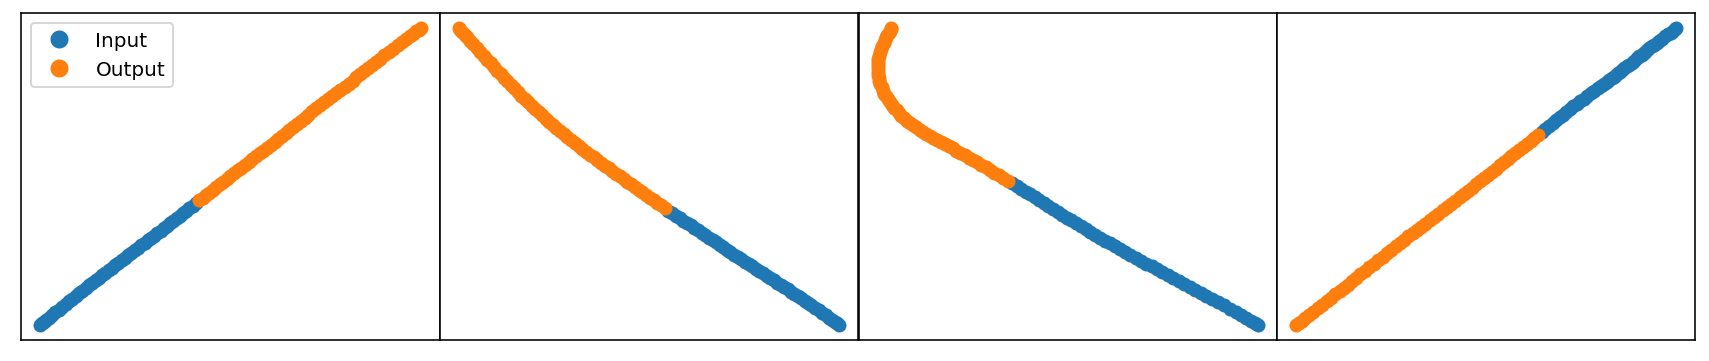

In [59]:
for (X, y) in vis_loader:
    show_sample_batch((X, y))
    break

### Input and Output Positions

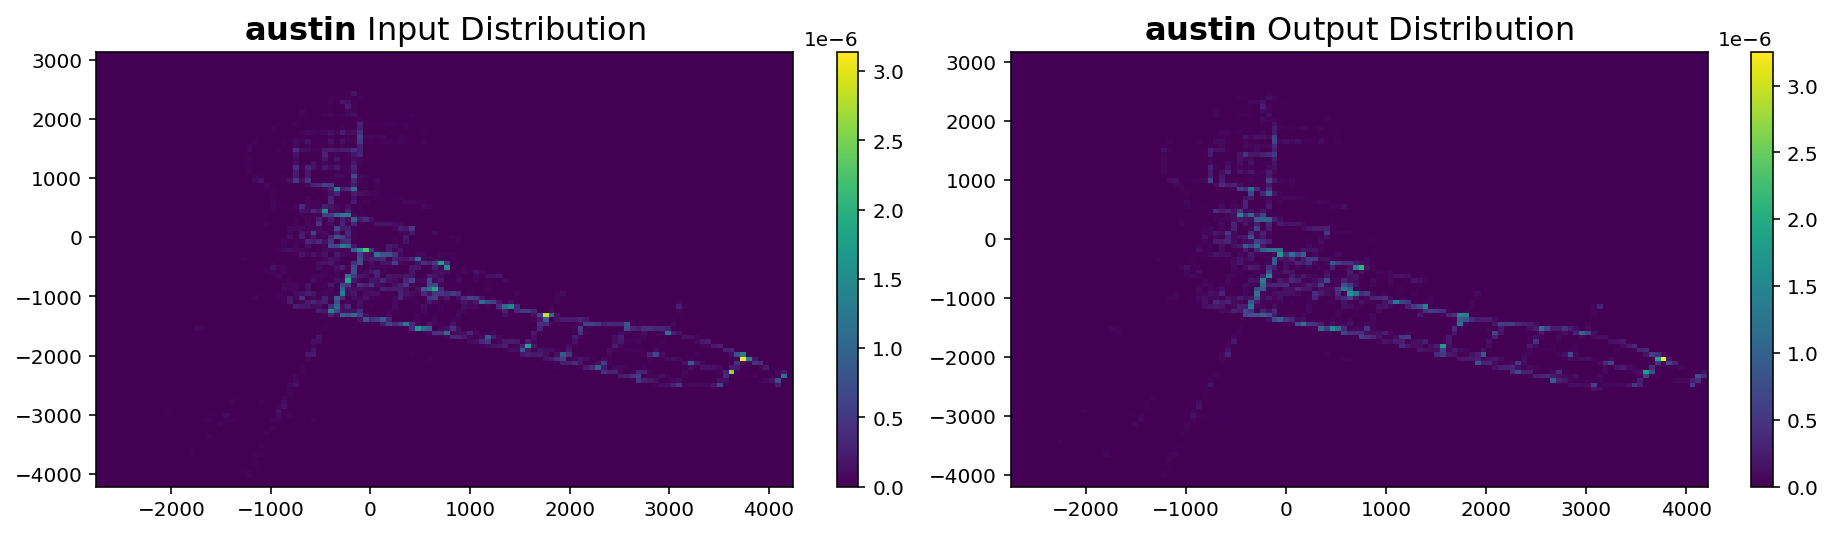

In [60]:
show_point_distributions(train_datasets[cities[0]]) # use other index for other cities

### Starting Positions

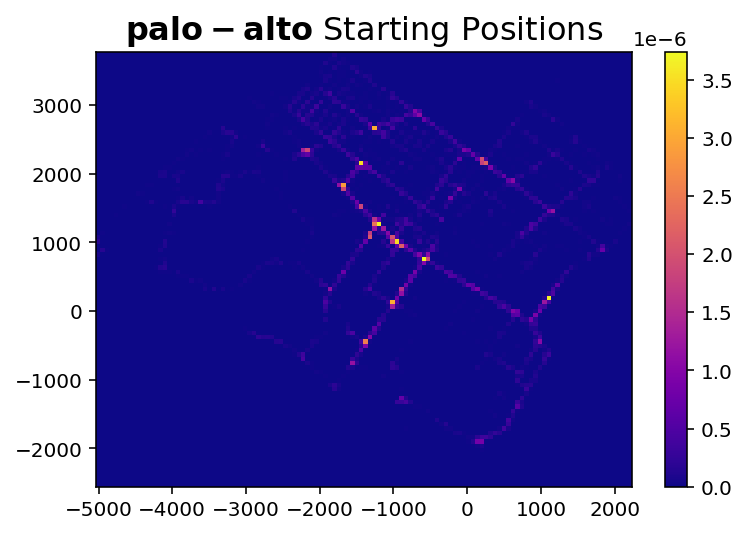

In [61]:
show_starting_positions(train_datasets[cities[5]]) # use other index for other cities

### Curvature

In [11]:
[d.transform() for d in train_datasets.values()]

43041it [09:36, 74.62it/s]
55029it [12:32, 73.09it/s]
43544it [09:44, 74.52it/s]
24465it [56:53,  7.17it/s] 
25744it [01:24, 305.16it/s]
11993it [01:16, 157.11it/s]


[None, None, None, None, None, None]

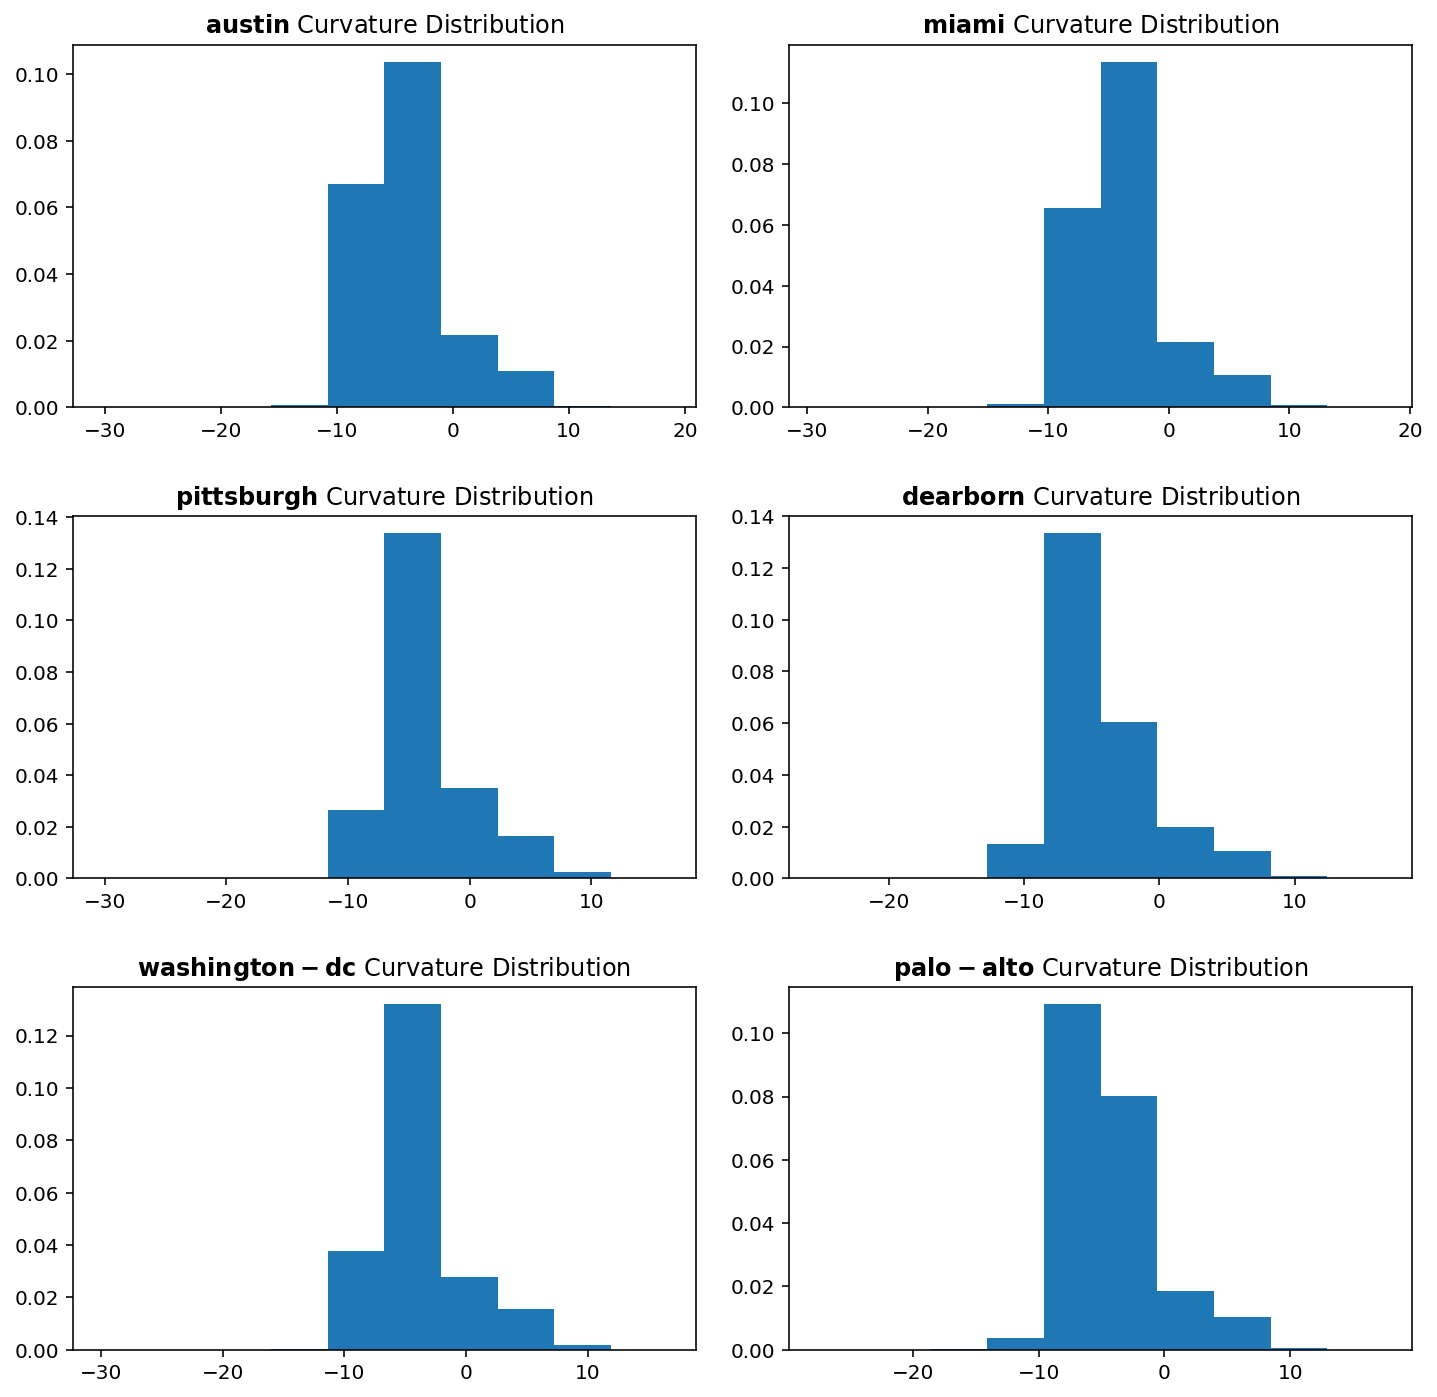

In [49]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=.3, wspace=.15)
ax = ax.ravel()
for i, c in enumerate(cities):
    curve = np.array(train_datasets[c].inputs)[:, :, -1].flatten()
    ax[i].hist(np.log(curve[curve != 0]), density=True)
    ax[i].set_title(r"$\bf{" + c + "}$" + ' Curvature Distribution')